In [3]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import csv

# List of product categories with URLs and selectors
product_urls = [
    {'wall lamp': 'https://www.flipkart.com/home-lighting/decor-lighting-accessories/wall-lamps/pr?sid=jhg,6w8,mbd&otracker=nmenu_sub_Home%20%26%20Furniture_0_Wall%20Lamp',
    'selectors':{
    'a':'.VJA3rP',
    'product_name': '.VU-ZEz',
    'price': '.CxhGGd',
    'avg_rating': '.XQDdHH',
    'seller_rating': '.uuhqql'
}},
    {'Gaming Consoles': 'https://www.flipkart.com/gaming/gaming-consoles/pr?sid=4rr,x1m&otracker=nmenu_sub_Sports%2C%20Books%20%26%20More_0_Gaming%20Consoles&otracker=nmenu_sub_Sports%2C%20Books%20%26%20More_0_Gaming%20Consoles',
    'selectors':{
    'a':'.VJA3rP',
    'product_name': '.VU-ZEz',
    'price': '.CxhGGd',
    'avg_rating': '.XQDdHH',
    'seller_rating': '.uuhqql'
}},
    {'Gaming Accessories': 'https://www.flipkart.com/gaming/gaming-accessories/pr?sid=4rr,km5&otracker=categorytree&otracker=nmenu_sub_Sports%2C%20Books%20%26%20More_0_Gaming%20Accessories&otracker=nmenu_sub_Sports%2C%20Books%20%26%20More_0_Gaming%20Accessories',
    'selectors':{
    'a':'.VJA3rP',
    'product_name': '.VU-ZEz',
    'price': '.CxhGGd',
    'avg_rating': '.XQDdHH',
    'seller_rating': '.uuhqql'
}},
    {'Riding gear': 'https://www.flipkart.com/automotive/accessories-spare-parts/helmets-riding-gear/pr?p%5B%5D=facets.availability%255B%255D%3DExclude%2BOut%2Bof%2BStock&sid=0hx%2Cbwd%2Cbgt&otracker=nmenu_sub_Sports%2C%20Books%20%26%20More_0_Helmets%20%26%20Riding%20Gear&otracker=nmenu_sub_Sports%2C%20Books%20%26%20More_0_Helmets%20%26%20Riding%20Gears',
    'selectors':{
    'a':'.VJA3rP',
    'product_name': '.VU-ZEz',
    'price': '.CxhGGd',
    'avg_rating': '.XQDdHH',
    'seller_rating': '.uuhqql'
}},
    {'Academics': 'https://www.flipkart.com/the-education-store?otracker=nmenu_sub_Sports%2C%20Books%20%26%20More_0_Academics',
    'selectors':{
    'a':'.VJA3rP',
    'product_name': '.VU-ZEz',
    'price': '.CxhGGd',
    'avg_rating': '.XQDdHH',
    'seller_rating': '.uuhqql'
}},
    {'Pen': 'https://www.flipkart.com/pens-category-store?otracker=nmenu_sub_Sports%2C%20Books%20%26%20More_0_Pens&otracker=nmenu_sub_Sports%2C%20Books%20%26%20More_0_Pens',
    'selectors':{
    'a':'.VJA3rP',
    'product_name': '.VU-ZEz',
    'price': '.CxhGGd',
    'avg_rating': '.XQDdHH',
    'seller_rating': '.uuhqql'
}},
    {'Nuts': 'https://www.flipkart.com/food-nutrition/nuts-dry-fruits-combos/~gourmet-foods-/pr?sid=7jv,30b&p[]=facets.serviceability%5B%5D%3Dtrue&otracker=categorytree&otracker=nmenu_sub_Sports%2C%20Books%20%26%20More_0_Nuts%20%26%20Dry%20Fruits',
    'selectors':{
    'a':'.VJA3rP',
    'product_name': '.VU-ZEz',
    'price': '.CxhGGd',
    'avg_rating': '.XQDdHH',
    'seller_rating': '.uuhqql'
}},
    {'Fish': 'https://www.flipkart.com/pet-supplies/fish-aquatic/pr?sid=p3t,ljf&marketplace=FLIPKART&otracker=nmenu_sub_Home%20%26%20Furniture_0_Fish%20%26%20Aquatics',
    'selectors':{
    'a':'.VJA3rP',
    'product_name': '.VU-ZEz',
    'price': '.CxhGGd',
    'avg_rating': '.XQDdHH',
    'seller_rating': '.uuhqql'
}},
    {'Cats': 'https://www.flipkart.com/pet-supplies/cats/pr?sid=p3t,0mo&marketplace=FLIPKART&otracker=nmenu_sub_Home%20%26%20Furniture_0_Cats',
    'selectors':{
    'a':'.VJA3rP',
    'product_name': '.VU-ZEz',
    'price': '.CxhGGd',
    'avg_rating': '.XQDdHH',
    'seller_rating': '.uuhqql'
}},
    {'Dogs': 'https://www.flipkart.com/pet-supplies/dogs/pr?sid=p3t,ea3&marketplace=FLIPKART&otracker=nmenu_sub_Home%20%26%20Furniture_0_Dogs',
    'selectors':{
    'a':'.VJA3rP',
    'product_name': '.VU-ZEz',
    'price': '.CxhGGd',
    'avg_rating': '.XQDdHH',
    'seller_rating': '.uuhqql'
}},
    {'Bulbs': 'https://www.flipkart.com/home-lighting/utility-lightling/bulbs/pr?sid=jhg,yqn,feb&marketplace=FLIPKART&otracker=nmenu_sub_Home%20%26%20Furniture_0_Bulbs',
    'selectors':{
    'a':'.VJA3rP',
    'product_name': '.VU-ZEz',
    'price': '.CxhGGd',
    'avg_rating': '.XQDdHH',
    'seller_rating': '.uuhqql'
}},
    {'Bedsheets': 'https://www.flipkart.com/home-furnishing/bed-linen-blankets/bedsheets/pr?sid=jra,knw,qcw&marketplace=FLIPKART&otracker=nmenu_sub_Home%20%26%20Furniture_0_Bedsheets',
    'selectors':{
    'a':'.VJA3rP',
    'product_name': '.VU-ZEz',
    'price': '.CxhGGd',
    'avg_rating': '.XQDdHH',
    'seller_rating': '.uuhqql'
}},
    {'Backpacks': 'https://www.flipkart.com/bags-wallets-belts/bags-backpacks/backpacks/pr?sid=reh,4d7,ak9&otracker=nmenu_sub_Men_0_Backpacks',
    'selectors':{
    'a':'.rPDeLR',
    'product_name': '.VU-ZEz',
    'price': '.CxhGGd',
    'avg_rating': '.XQDdHH',
    'seller_rating': '.uuhqql'
}},
    {'Jeans': 'https://www.flipkart.com/clothing-and-accessories/bottomwear/jeans/men-jeans/pr?sid=clo,vua,k58,i51&otracker=categorytree&otracker=nmenu_sub_Men_0_Jeans',
    'selectors':{
    'a':'.rPDeLR',
    'product_name': '.VU-ZEz',
    'price': '.CxhGGd',
    'avg_rating': '.XQDdHH',
    'seller_rating': '.uuhqql'
}},
    {'T-shirts': 'https://www.flipkart.com/clothing-and-accessories/topwear/tshirt/men-tshirt/pr?sid=clo,ash,ank,edy&otracker=categorytree&otracker=nmenu_sub_Men_0_T-Shirts',
    'selectors':{
    'a':'.rPDeLR',
    'product_name': '.VU-ZEz',
    'price': '.CxhGGd',
    'avg_rating': '.XQDdHH',
    'seller_rating': '.uuhqql'
}},
    {'Oven': 'https://www.flipkart.com/search?q=microwave+oven&sid=j9e%2Cm38%2Co49&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_10_na_na_na&otracker1=AS_QueryStore_OrganicAutoSuggest_1_10_na_na_na&as-pos=1&as-type=RECENT&suggestionId=microwave+oven%7CMicrowave+Ovens&requestId=7786a822-b9b3-433c-8d4c-008ae2772f8d&as-backfill=on&otracker=nmenu_sub_TVs%20%26%20Appliances_0_Microwave%20Ovens',
    'selectors':{
    'a':'.CGtC98',
    'product_name': '.VU-ZEz',
    'price': '.CxhGGd',
    'avg_rating': '.XQDdHH',
    'seller_rating': '.uuhqql'
}},
    {'AC': 'https://www.flipkart.com/air-conditioners/pr?sid=j9e,abm,c54&p[]=facets.fulfilled_by%255B%255D%3datalipkart%2BAssured&p[]=facets.technology%255B%255D%3DInverter&p[]=facets.serviceability%5B%5D%3Dtrue&otracker=categorytree&otracker=nmenu_sub_TVs%20%26%20Appliances_0_Inverter%20AC',
    'selectors':{
    'a':'.CGtC98',
    'product_name': '.VU-ZEz',
    'price': '.CxhGGd',
    'avg_rating': '.XQDdHH',
    'seller_rating': '.uuhqql'
}},
    {'Print': 'https://www.flipkart.com/printer-inks-store?otracker=nmenu_sub_Electronics_0_Printers%20%26%20Ink%20Cartridges',
    'selectors':{
    'a':'.VJA3rP',
    'product_name': '.VU-ZEz',
    'price': '.CxhGGd',
    'avg_rating': '.XQDdHH',
    'seller_rating': '.uuhqql'
}},
    {'Mobile Cases': 'https://www.flipkart.com/mobile-accessories/cases-and-covers/pr?sid=tyy,4mr,q2u&otracker=nmenu_sub_Electronics_0_Mobile%20Cases',
    'selectors':{
    'a':'.VJA3rP',
    'product_name': '.VU-ZEz',
    'price': '.CxhGGd',
    'avg_rating': '.XQDdHH',
    'seller_rating': '.uuhqql'
}},
    {'Smart Watches': 'https://www.flipkart.com/search?q=smart+watch&sid=ajy%2Cbuh&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_8_na_na_ps&otracker1=AS_QueryStore_OrganicAutoSuggest_1_8_na_na_ps&as-pos=1&as-type=RECENT&suggestionId=smart+watch%7CSmart+Watches&requestId=a3a0ac86-976b-49e7-b440-ae427f9159e9&as-backfill=on&otracker=nmenu_sub_Electronics_0_Smart%20Watches',
    'selectors':{
    'a':'.rPDeLR',
    'product_name': '.VU-ZEz',
    'price': '.CxhGGd',
    'avg_rating': '.XQDdHH',
    'seller_rating': '.uuhqql'
}},
    {'Weighing scale': 'https://www.flipkart.com/beauty-and-personal-care/health-care/health-care-devices/weighing-scales/pr?sid=t06,nyl,bvv,o4o&otracker=nmenu_sub_Electronics_0_Weighing%20Scale',
    'selectors':{
    'a':'.VJA3rP',
    'product_name': '.VU-ZEz',
    'price': '.CxhGGd',
    'avg_rating': '.XQDdHH',
    'seller_rating': '.uuhqql'
}}
]

# Function to scrape product URLs from category page
def get_product_urls(category_url, a_selector):
    service = Service(ChromeDriverManager().install())
    driver = webdriver.Chrome(service=service)
    
    driver.get(category_url)
    
    try:
        WebDriverWait(driver, 2).until(
            EC.presence_of_all_elements_located((By.CSS_SELECTOR, a_selector))
        )
        product_elements = driver.find_elements(By.CSS_SELECTOR, a_selector)
        
        product_links = [product.get_attribute('href') for product in product_elements if product.get_attribute('href')]
    except Exception as e:
        print(f"Error fetching product URLs: {e}")
        product_links = []

    driver.quit()
    return product_links

# Function to scrape product details
def scrape_product_details(url, selectors):
    service = Service(ChromeDriverManager().install())
    driver = webdriver.Chrome(service=service)

    driver.get(url)

    product_data = {'url': url}
    for attribute, selector in selectors.items():
        try:
            element = WebDriverWait(driver, 2).until(
                EC.presence_of_element_located((By.CSS_SELECTOR, selector))
            )
            product_data[attribute] = element.text.strip()
        except:
            product_data[attribute] = 'Not available'

    driver.quit()
    return product_data

# Function to save data to CSV
def save_to_csv(scraped_data, filename):
    if scraped_data:
        fieldnames = ['url'] + list(scraped_data[0].keys())  # Ensure headers include all fields
        with open(filename, mode='w', newline='', encoding='utf-8') as file:
            writer = csv.DictWriter(file, fieldnames=fieldnames)
            writer.writeheader()
            for data in scraped_data:
                writer.writerow(data)

all_scraped_data = []
c=0
for product in product_urls:
    category_name = list(product.keys())[0]  # Get the product name
    url = product[category_name]  # Get the URL
    selectors = product['selectors']  # Get the selectors

    print(f"Fetching product URLs for {category_name}...")

    product_links = get_product_urls(url, selectors['a'])

    print(f"Found {len(product_links)} product URLs for {category_name}. Scraping details...")

    for link in product_links:
        c += 1
        product_data = scrape_product_details(link, selectors)
        product_data['category'] = category_name 
        filename = 'scraped_products.csv' + str(c)
        all_scraped_data.append(product_data)
save_to_csv(all_scraped_data,filename)
print("Scraping complete."+ filename)





Fetching product URLs for wall lamp...
Found 40 product URLs for wall lamp. Scraping details...
Fetching product URLs for Gaming Consoles...
Found 40 product URLs for Gaming Consoles. Scraping details...
Fetching product URLs for Gaming Accessories...
Found 40 product URLs for Gaming Accessories. Scraping details...
Fetching product URLs for Riding gear...
Found 40 product URLs for Riding gear. Scraping details...
Fetching product URLs for Academics...
Found 12 product URLs for Academics. Scraping details...
Fetching product URLs for Pen...
Found 18 product URLs for Pen. Scraping details...
Fetching product URLs for Nuts...
Found 40 product URLs for Nuts. Scraping details...
Fetching product URLs for Fish...
Found 40 product URLs for Fish. Scraping details...
Fetching product URLs for Cats...
Found 40 product URLs for Cats. Scraping details...
Fetching product URLs for Dogs...
Found 40 product URLs for Dogs. Scraping details...
Fetching product URLs for Bulbs...
Found 40 product URLs f

In [ ]:
import csv

input_file = 'scraped_products.csv730'
output_file = 'output.csv'

# Read the data from the input CSV file
with open(input_file, mode='r', newline='', encoding='utf-8') as infile:
    reader = csv.DictReader(infile)
    data = []
    for row in reader:
        # Create a new row with only the required columns
        new_row = {
            'product_name': row['product_name'],
            'avg_rating': row['avg_rating'],
            'seller_rating': row['seller_rating'],
            'category': row['category']
        }
        data.append(new_row)

# Write the new data to the output CSV file
with open(output_file, mode='w', newline='', encoding='utf-8') as outfile:
    fieldnames = ['product_name', 'avg_rating', 'seller_rating', 'category']
    writer = csv.DictWriter(outfile, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(data)

print(f'Data successfully transformed and saved to {output_file}')


In [6]:
import pandas as pd
data = pd.read_csv('output.csv')
data["avg_rating"] = pd.to_numeric(data["avg_rating"], errors="coerce")
data["seller_rating"] = pd.to_numeric(data["seller_rating"], errors="coerce")

# Fill missing values in 'avg_rating' and 'seller_rating' with mean value in their category
for column in ["avg_rating", "seller_rating"]:
    data[column] = data.groupby("category")[column].transform(lambda x: x.fillna(x.mean()))

In [10]:
data.iloc[7]

product_name     AA creative Lights Wallchiere Wall Lamp With Bulb
avg_rating                                                3.876923
seller_rating                                             3.708571
category                                                 wall lamp
Name: 7, dtype: object

In [11]:
titles = " ".join(title for title in data['product_name'].astype(str)) #joining all product names

In [12]:
titles

'ACARDO Solar lamp Wallchiere Wall Lamp With Bulb Delbay Uplight Wall Lamp Without Bulb  (Pack of 2) LUMINX Swing Arm Wall Light Wall Lamp With Bulb GLINTAC Swing Arm Wall Light Wall Lamp With Bulb Blissbells Step Light Wall Lamp With Bulb Decor City Wallchiere Wall Lamp Without Bulb LUMINX Uplight Wall Lamp With Bulb AA creative Lights Wallchiere Wall Lamp With Bulb GLINTAC Wallchiere Wall Lamp With Bulb  (Pack of 3) GLINTAC Swing Arm Wall Light Wall Lamp With Bulb Delbay Uplight Wall Lamp Without Bulb  (Pack of 2) KINIS Wallchiere Wall Lamp With Bulb Oystal Prime Swing Arm Wall Light Wall Lamp With Bulb VAH Picture Light Wall Lamp With Bulb HANGUL Wallchiere Wall Lamp With Bulb Blissbells Wallchiere Wall Lamp With Bulb Decor City Wallchiere Wall Lamp Without Bulb Brightlyt Wallchiere Wall Lamp Without Bulb ledvance Wallchiere Wall Lamp With Bulb  (Pack of 4) rahul Uplight Wall Lamp Without Bulb Delbay Wallchiere Wall Lamp Without Bulb  (Pack of 2) Cruv Wallchiere Wall Lamp Without Bu

In [15]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400)
wordcloud.generate(titles)

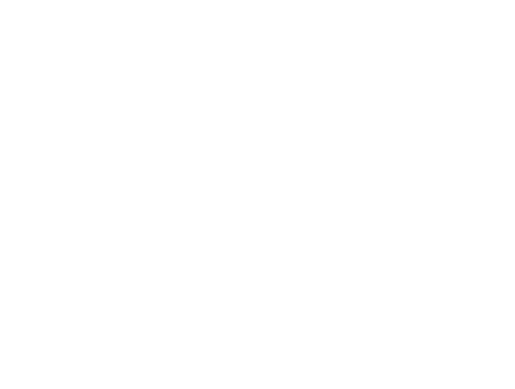

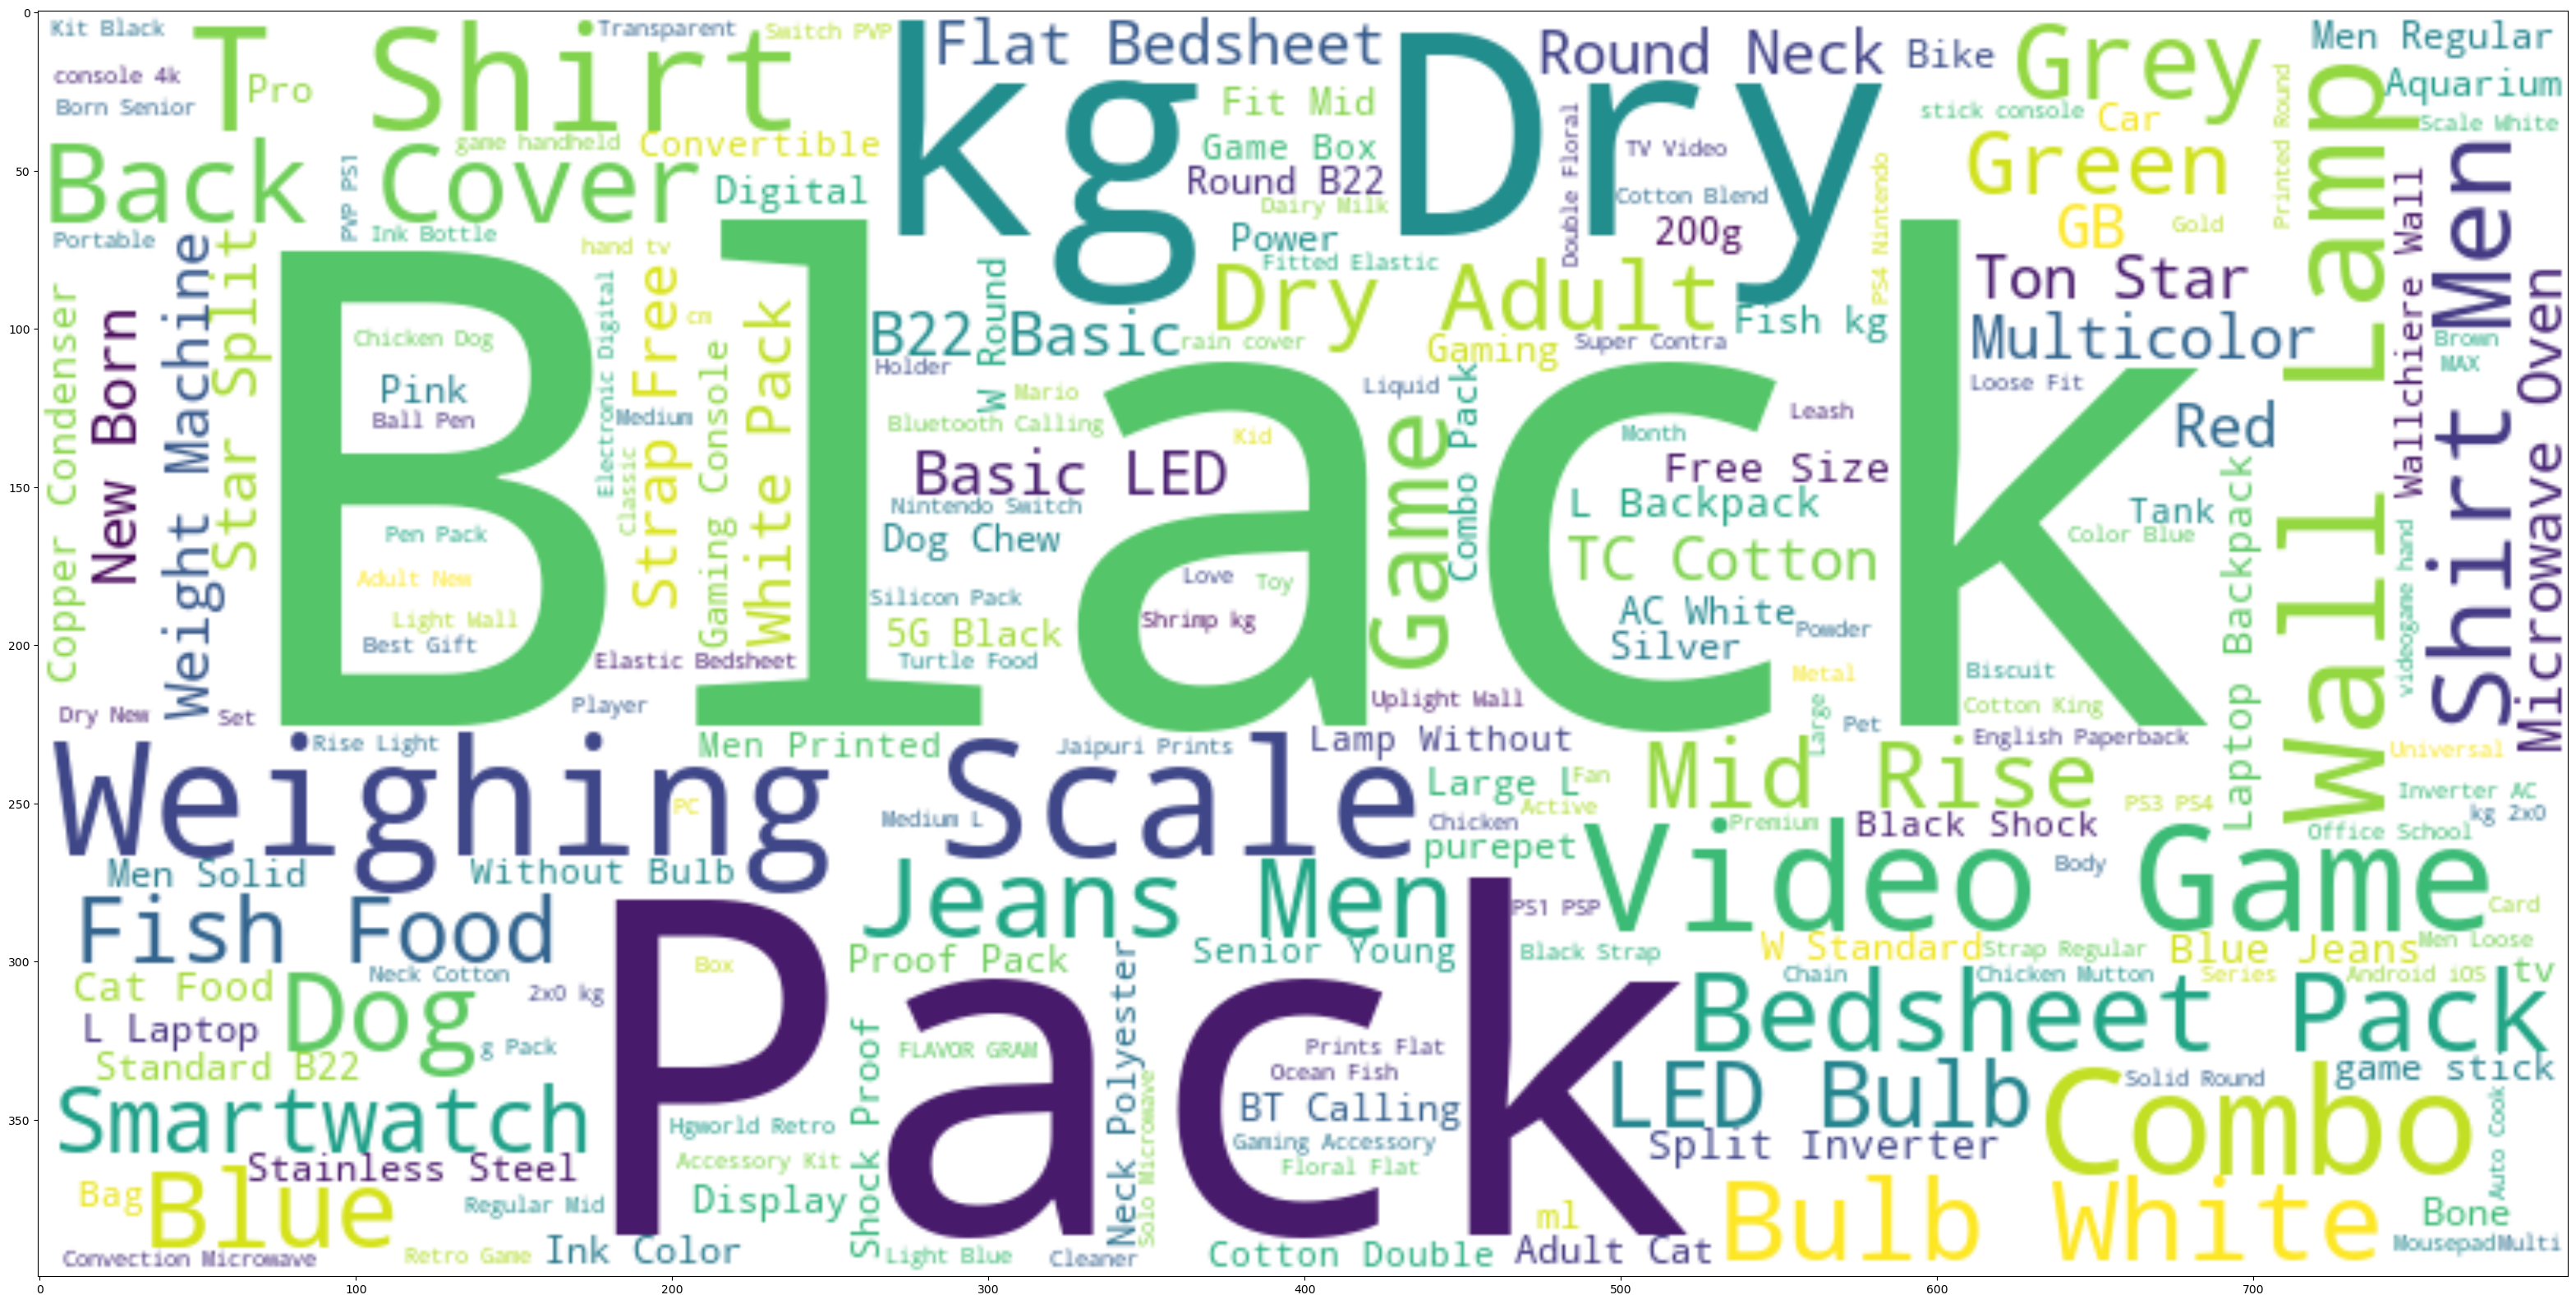

In [17]:
import matplotlib.pyplot as plt
plt.axis("off")
plt.figure(figsize=(40,20))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

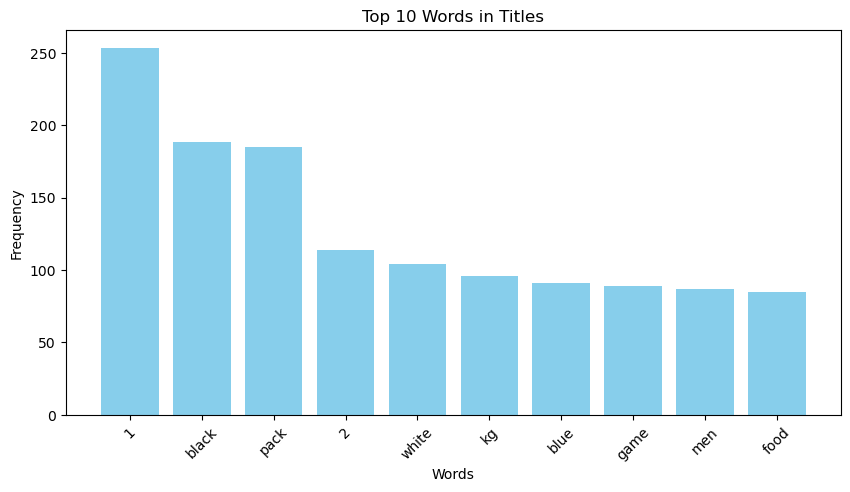

In [20]:
import matplotlib.pyplot as plt
from collections import Counter
import re

if isinstance(titles, str):
    titles = [titles]  

words = []
for title in titles:
    words.extend([word.lower() for word in re.findall(r'\b\w+\b', title) if word.lower() not in stopwords])

word_counts = Counter(words)

top_words = word_counts.most_common(10)

words, counts = zip(*top_words)

plt.figure(figsize=(10, 5))
plt.bar(words, counts, color="skyblue")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 10 Words in Titles")
plt.xticks(rotation=45)
plt.show()


In [38]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download("stopwords")
nltk.download("wordnet")


lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

def preprocess_text(text):
    text = text.lower()  
    text = re.sub(r"[^a-z0-9]", " ", text)  # Remove punctuation and special characters
    words = text.split() 
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # Remove stopwords & lemmatize
    return " ".join(words)

data["processed_text"] = data["product_name"].apply(preprocess_text)  


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\verma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\verma\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [39]:
data

,product_name,avg_rating,seller_rating,category,processed_text
0,ACARDO Solar lamp Wallchiere Wall Lamp With Bulb,3.7,3.2,wall lamp,acardo solar lamp wallchiere wall lamp bulb
1,Delbay Uplight Wall Lamp Without Bulb (Pack o...,3.7,3.5,wall lamp,delbay uplight wall lamp without bulb pack 2
2,LUMINX Swing Arm Wall Light Wall Lamp With Bulb,4.1,3.4,wall lamp,luminx swing arm wall light wall lamp bulb
3,GLINTAC Swing Arm Wall Light Wall Lamp With Bulb,3.9,3.3,wall lamp,glintac swing arm wall light wall lamp bulb
4,Blissbells Step Light Wall Lamp With Bulb,4.0,4.1,wall lamp,blissbells step light wall lamp bulb
...,...,...,...,...,...
725,Tenant Electronic Digital 1Gram-10 Kg Weight S...,3.7,3.9,Weighing scale,tenant electronic digital 1gram 10 kg weight s...
726,MCP Healthcare Analogue Personal Weight Machin...,3.9,3.2,Weighing scale,mcp healthcare analogue personal weight machin...
727,"KiloMaxx KM-54, 100Kg With UltraBright Green D...",4.0,3.4,Weighing scale,kilomaxx km 54 100kg ultrabright green display...
728,BOLDFIT Weight Machine for Human Weight Digita...,4.2,3.8,Weighing scale,boldfit weight machine human weight digital we...


In [101]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import re
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time



# TF-IDF Vectorizer and cosine similarity calculation
tfidf = TfidfVectorizer(stop_words='english')

# Fit and transform the text data 
tfidf_matrix = tfidf.fit_transform(data['processed_text'])
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

def preprocess_product_name(product_name):
    product_name = product_name.strip()
    product_name = product_name.lower()
    product_name = re.sub(r'[^a-z0-9\s]', '', product_name)
    return product_name

# Function to match words in product descriptions using TF-IDF
def get_word_level_recommendations(input_product, threshold=0.01, data=data):
    input_product_processed = preprocess_product_name(input_product)
    
    # Combine the input product with the dataset's processed texts
    processed_texts = [input_product_processed] + data['processed_text'].tolist()
    
    # Create the TF-IDF vectorizer to extract word-level features
    tfidf = TfidfVectorizer(stop_words='english', tokenizer=lambda x: x.split())  
    tfidf_matrix = tfidf.fit_transform(processed_texts)

    # Calculate cosine similarity between the input product and the entire dataset
    cosine_sim = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:])
    
    # Get the pairwise similarity scores
    sim_scores = list(enumerate(cosine_sim[0]))

    # Sort the products based on similarity scores in descending order
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Filter out products below the threshold
    sim_scores = [score for score in sim_scores if score[1] >= threshold]

    if not sim_scores:
        print(f"No products found with a similarity score above {threshold}")
        print(f"Cosine similarities: {cosine_sim[0]}")
    
    product_indices = [i[0] for i in sim_scores]
    
    recommendations = data.iloc[product_indices][['product_name', 'avg_rating', 'seller_rating', 'category']]
        
    return recommendations

# Function to extract product name from the page
def extract_product_name(driver):
    try:
        product_name_element = driver.find_element(By.CLASS_NAME, 'VU-ZEz')
        if product_name_element:
            return product_name_element.text.strip()
    except Exception as e:
        print("Error extracting product name:", e)
    return None

# Function to track browsing and make recommendations
def track_browsing_and_recommendations():
    chrome_options = Options()

    chrome_binary_path = "C:\\Program Files\\Google\\Chrome\\Application\\chrome.exe"  
    chrome_options.binary_location = chrome_binary_path

    driver_path = 'C:/path/to/chromedriver.exe' 
    driver = webdriver.Chrome(service=Service(), options=chrome_options)
    
    print("Chrome opened. You can now browse freely.")

    product_name = None  

    try:
        while True:
            time.sleep(5)
            
            # Extract the product name if found
            product_name = extract_product_name(driver)
            
            if product_name:
                print(f"Product name found: {product_name}")
                
                # Pass the product name to the recommendation function
                recommended_products = get_word_level_recommendations(product_name, threshold=0.6)
                print("\nRecommended Products:")
                print(recommended_products)
                
                # Stop after processing one product
                break

            

    except KeyboardInterrupt:
        print("Stopped by user.")
    finally:
        driver.quit()

track_browsing_and_recommendations()


Chrome opened. You can now browse freely.
Error extracting product name: Message: no such element: Unable to locate element: {"method":"css selector","selector":".VU-ZEz"}
  (Session info: chrome=132.0.6834.160); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x00007FF7FA8702F5+28725]
	(No symbol) [0x00007FF7FA7D2AE0]
	(No symbol) [0x00007FF7FA66510A]
	(No symbol) [0x00007FF7FA6B93D2]
	(No symbol) [0x00007FF7FA6B95FC]
	(No symbol) [0x00007FF7FA703407]
	(No symbol) [0x00007FF7FA6DFFEF]
	(No symbol) [0x00007FF7FA700181]
	(No symbol) [0x00007FF7FA6DFD53]
	(No symbol) [0x00007FF7FA6AA0E3]
	(No symbol) [0x00007FF7FA6AB471]
	GetHandleVerifier [0x00007FF7FAB9F30D+3366989]
	GetHandleVerifier [0x00007FF7FABB12F0+3440688]
	GetHandleVerifier [0x00007FF7FABA78FD+3401277]
	GetHandleVerifier [0x00007FF7FA93AAAB+858091]
	(No symbol) [0x00007FF7FA7DE74F]
	(No symbol) [0x000

D:\Anaconda1\Lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
